In [29]:
from sklearn.metrics import accuracy_score, log_loss
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#read training data
train = pd.read_csv('train.csv')
#read test data
test = pd.read_csv('test.csv')
dt_x = list()
dt_y = list()
best_depth = 0
best_acc = 0

In [31]:
def encode(train, test):
    le = LabelEncoder().fit(train.label)
    labels = le.transform(train.label)  # encode label
    classes = list(le.classes_)  # save column names for submission
    test_ids = test.id  # save test ids for submission
    train = train.drop('id', axis=1)
    train = train.drop('label', axis=1)
    test = test.drop('id', axis=1)
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

#Make sure heads are at start
train.head(1)
test.head(1)
test=np.array(test)


In [32]:
#Split the data randomly as 80/20
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.2)
sss.get_n_splits(train, labels)
for train_index, test_index in sss.split(train, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [33]:
#for loop to compare decision trees from depth=2 to 12
#Going to 12 because trees start overfitting after depth of 12
for i in range(2, 13):
    dt = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    dt.fit(X_train, y_train)
    predict = dt.predict(X_train)
    answer = sklearn.metrics.accuracy_score(y_train, predict) * 100
    if answer > best_acc:
        best_acc = answer
        best_depth = i
    print('Accuracy of decision tree for max depth:', i, 'is:', answer, '%')
    dt_x.append(i)
    dt_y.append(answer)

Accuracy of decision tree for max depth: 2 is: 28.454861111111114 %
Accuracy of decision tree for max depth: 3 is: 30.138888888888886 %
Accuracy of decision tree for max depth: 4 is: 32.760416666666664 %
Accuracy of decision tree for max depth: 5 is: 36.28472222222222 %
Accuracy of decision tree for max depth: 6 is: 40.74652777777778 %
Accuracy of decision tree for max depth: 7 is: 46.25 %
Accuracy of decision tree for max depth: 8 is: 54.861111111111114 %
Accuracy of decision tree for max depth: 9 is: 63.05555555555556 %
Accuracy of decision tree for max depth: 10 is: 72.95138888888889 %
Accuracy of decision tree for max depth: 11 is: 82.23958333333333 %
Accuracy of decision tree for max depth: 12 is: 89.47916666666667 %


In [34]:
#Limiting generation of forest to 1000 trees 
#max depth of each tree is chosen from the pool of decision trees above
#Best accuracy is calculated in the for loop above
#Depth of tree with the best accuracy is selected

# Random Forest classifier
RFclassifier = RandomForestClassifier(max_depth=best_depth, n_estimators=1000)

#Train the model
RFclassifier.fit(X_train, y_train)
name = RFclassifier.__class__.__name__

In [35]:

print(name)

print('****Results****')

#Predict output of data from train.csv
train_predictions = RFclassifier.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = RFclassifier.predict_proba(X_test)
ll = log_loss(y_test, train_predictions)
print("Log Loss: {}".format(ll))

test_prediction= RFclassifier.predict(test)

RandomForestClassifier
****Results****
Accuracy: 84.7222%
Log Loss: 1.3162561419968752


In [36]:
# dictionary of predictions
dict = {'id': test_ids, 'label': test_prediction}

df = pd.DataFrame(dict)

# saving the dataframe
df.to_csv('predictions.csv',index=False)


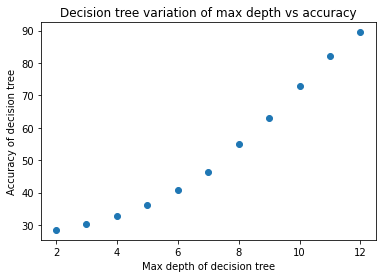

In [37]:
#As the depth of decision trees increase accuracy starts increasing.
#But Decision trees are prone to overfitting
#This problem is solved by the randomforest classifier
#Best accuracy is at 89.479% at depth 12 for this run
plt.scatter(dt_x, dt_y)
plt.title('Decision tree variation of max depth vs accuracy')
plt.xlabel('Max depth of decision tree')
plt.ylabel('Accuracy of decision tree')
plt.show()